In [1]:
#
# Julia verson of code from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/Sfirstorder.m
#

In [2]:
using DifferentialEquations, DiffEqSensitivity
using Plots
using ForwardDiff

In [3]:
function rates!(dc, c, p, t)
    dc[1] = -p[1] * c[1]
end

rates! (generic function with 1 method)

In [4]:
c0 = [2.0]
p = [1.0]
tspan = (0.0, 5.0)
prob = ODEProblem(rates!, c0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 1-element Vector{Float64}:
 2.0

In [19]:
function f(theta)
    _prob = remake(prob, p = [theta[2]], u0 = [theta[1]])
    sol = solve(_prob, Rosenbrock23(), saveat = 0.1)
    return sol
end

f (generic function with 1 method)

In [20]:
sol = f([2.0, 1.0])
sens = ForwardDiff.jacobian(f, [2.0, 1.0])

51×2 Matrix{Float64}:
 1.0          0.0
 0.904833    -0.180991
 0.818704    -0.32764
 0.740762    -0.444795
 0.670239    -0.536677
 0.606434    -0.607017
 0.54864     -0.659403
 0.496396    -0.696093
 0.449126    -0.71983
 0.406301    -0.732962
 0.367617    -0.736823
 0.332544    -0.733568
 0.300886    -0.723992
 ⋮           
 0.0199696   -0.157411
 0.0180691   -0.146049
 0.0163454   -0.13541
 0.0147723   -0.125438
 0.0133499   -0.116132
 0.0120795   -0.107499
 0.010927    -0.0994455
 0.00987537  -0.09192
 0.00892447  -0.0849226
 0.00807353  -0.0784509
 0.00730289  -0.072437
 0.00660564  -0.0668561

In [26]:
sens_ca0_ad = sens[:,1]
sens_ca0_analy = [exp(-1.0*t) for t in sol.t]

sens_k_ad = sens[:, 2]
sens_k_analy = [-t * 2.0 * exp(-1.0*t) for t in sol.t]

51-element Vector{Float64}:
 -0.0
 -0.18096748360719192
 -0.3274923012311928
 -0.4444909324090307
 -0.5362560368285115
 -0.6065306597126334
 -0.6585739633128318
 -0.6952194253079733
 -0.7189263425875545
 -0.7318253875330785
 -0.7357588823428847
 -0.732316384135775
 -0.7228661085892851
  ⋮
 -0.15788690927727425
 -0.14652511110987343
 -0.13589593829444227
 -0.1259628452920127
 -0.11668960750492803
 -0.10804059114700225
 -0.09998096884418076
 -0.09247688885062898
 -0.08549560475594067
 -0.07900557167059229
 -0.07297651409505852
 -0.06737946999085467

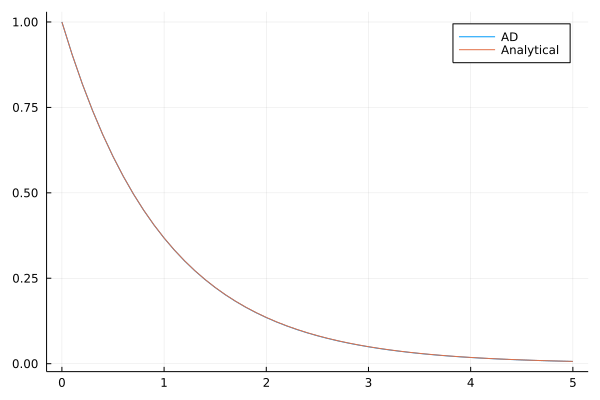

In [25]:
# Sensitivity to ca0
plot(sol.t, sens_ca0_ad, label = "AD")
plot!(sol.t, sens_ca0_analy, label = "Analytical")

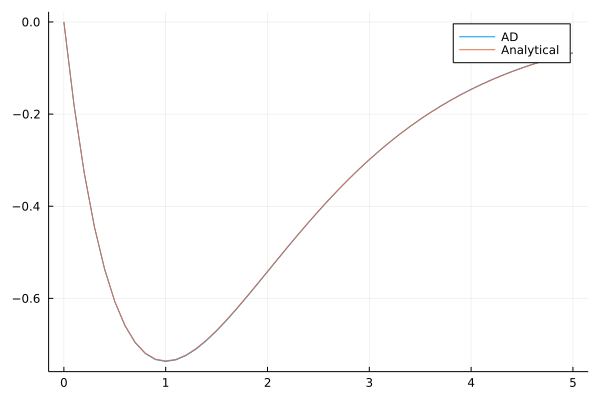

In [27]:
# Sensitivity to k
plot(sol.t, sens_k_ad, label = "AD")
plot!(sol.t, sens_k_analy, label = "Analytical")